In [88]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
%matplotlib inline

df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True,drop=True)
df =pd.get_dummies(df, columns=['gender'],drop_first=True)
df

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,Labour,43,3,3,4,1,2,2,0
1,Labour,36,4,4,4,4,5,2,1
2,Labour,35,4,4,5,2,3,2,1
3,Labour,24,4,2,2,1,4,0,0
4,Labour,41,2,2,1,1,6,2,1
...,...,...,...,...,...,...,...,...,...
1512,Conservative,67,5,3,2,4,11,3,1
1513,Conservative,73,2,2,4,4,8,2,1
1514,Labour,37,3,3,5,4,2,2,1
1515,Conservative,61,3,3,1,4,11,2,1


In [89]:
X = df.drop("vote" , axis=1)
y = df['vote']

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
#Build Model
clf = GradientBoostingClassifier(random_state=1)
model=clf.fit(X_train,y_train)

In [92]:
model.score(X_train, y_train)

0.885956644674835

In [93]:
model.score(X_test, y_test)

0.8421052631578947

In [94]:
from sklearn.model_selection import GridSearchCV
grid={'n_estimators':[30],   # 40,50,100,150,200
    'learning_rate':[1.0],     # 0.1,0.01,0.5
    'loss':['deviance'],     # 'exponential'
    'subsample':[1.0],     # 0.1,0.01,0.5
    'criterion':['friedman_mse'],   #  'squared_error', 'mse', 'mae'
    'min_samples_split':[2],     # 4,6,10
    'min_samples_leaf':[1],     # 3,5
    'min_weight_fraction_leaf':[0.0],     # 0.2,0.5
    'max_depth':[3],     # 4,6,10
    'validation_fraction':[0.1],     # 0.2,0.3
    'tol':[0.01],     # 0.001,0.0001
    'ccp_alpha':[0.0]}  # 0.2,0.4
model = GradientBoostingClassifier(random_state=1)

In [95]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [96]:
grid_search.fit(X_train, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'ccp_alpha': [0.0], 'criterion': ['friedman_mse'],
                         'learning_rate': [1.0], 'loss': ['deviance'],
                         'max_depth': [3], 'min_samples_leaf': [1],
                         'min_samples_split': [2],
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [30], 'subsample': [1.0],
                         'tol': [0.01], 'validation_fraction': [0.1]},
             scoring='f1')

In [97]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'learning_rate': 1.0, 'loss': 'deviance', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 30, 'subsample': 1.0, 'tol': 0.01, 'validation_fraction': 0.1} 

GradientBoostingClassifier(learning_rate=1.0, n_estimators=30, random_state=1,
                           tol=0.01)


In [98]:
clf = GradientBoostingClassifier(tol=0.01)
model=clf.fit(X_train,y_train)

In [99]:
model.score(X_train, y_train)

0.885956644674835

In [100]:
model.score(X_test, y_test)

0.8421052631578947

In [101]:
from imblearn.over_sampling import SMOTE
print(X_train.shape)
print(X_test.shape)

(1061, 8)
(456, 8)


In [102]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
X_train_res.shape

(1478, 8)

In [103]:
clf = GradientBoostingClassifier(random_state=1)
model.fit(X_train_res, y_train_res)
model.score(X_train_res, y_train_res)

0.8836265223274695

In [104]:
model.score(X_test, y_test)

0.8179824561403509

In [105]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2, interaction_only=True)

#poly = PolynomialFeatures()

X_poly = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.30, random_state=1)
X_train.shape

(1061, 37)

In [106]:
model.fit(X_train,y_train)
model.score(X_train, y_train)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


0.9189443920829407

In [107]:
model.score(X_test, y_test)

C:\Users\Jitu\anaconda3\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


0.831140350877193

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1, stratify=y)

In [109]:
clf = GradientBoostingClassifier(random_state=1)
model=clf.fit(X_train,y_train)

In [110]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

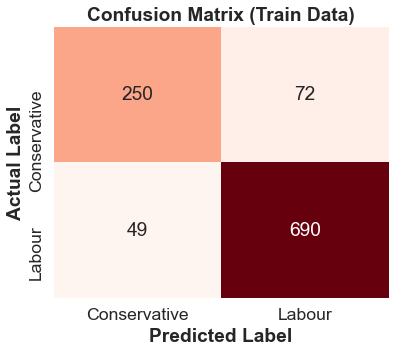

In [111]:
sns.set(font_scale=1.6)
plt.figure(figsize=(6,5))
confusion_matrix(y_train,ytrain_predict,labels=['Conservative','Labour'])
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='Reds',xticklabels=['Conservative','Labour'],yticklabels=['Conservative','Labour'])
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Train Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

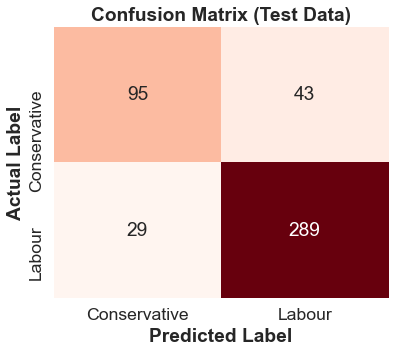

In [112]:
## Confusion matrix on the test data
sns.set(font_scale=1.6)
plt.figure(figsize=(6,5))
confusion_matrix(y_test,ytest_predict)
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='Reds',xticklabels=['Conservative','Labour'],yticklabels=['Conservative','Labour'])
plt.xlabel('Predicted Label',weight='bold')
plt.ylabel('Actual Label',weight='bold')
plt.title('Confusion Matrix (Test Data)',weight='bold')
plt.show()
sns.set(font_scale=1)

In [113]:
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

Conservative       0.84      0.78      0.81       322
      Labour       0.91      0.93      0.92       739

    accuracy                           0.89      1061
   macro avg       0.87      0.86      0.86      1061
weighted avg       0.88      0.89      0.88      1061
 



In [114]:
print(classification_report(y_test, ytest_predict),'\n');

              precision    recall  f1-score   support

Conservative       0.77      0.69      0.73       138
      Labour       0.87      0.91      0.89       318

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.84      0.84      0.84       456
 



AUC: 0.947


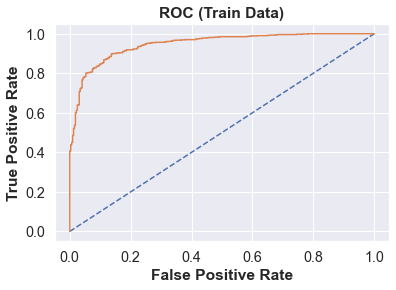

In [115]:
sns.set(font_scale=1.3)
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Train Data)',weight='bold')
sns.set(font_scale=1)

AUC: 0.904


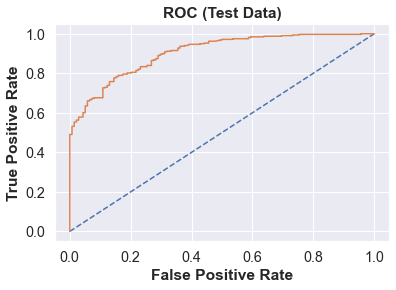

In [116]:
sns.set(font_scale=1.3)
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)
plt.xlabel('False Positive Rate',weight='bold')
plt.ylabel('True Positive Rate',weight='bold')
plt.title('ROC (Test Data)',weight='bold')
sns.set(font_scale=1)

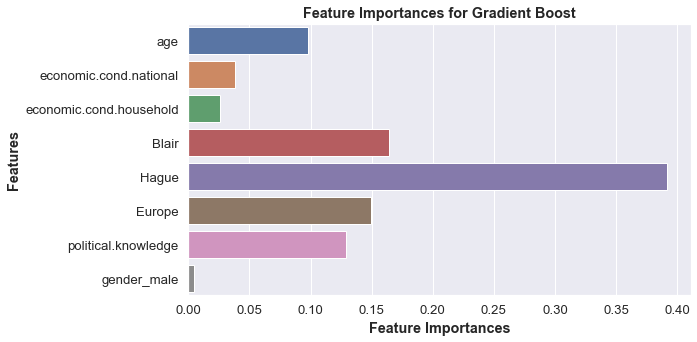

In [117]:
sns.set(font_scale=1.2)
plt.figure(figsize=(9,5))
plt.xlabel('Feature Importances',weight='bold')
plt.ylabel('Features',weight='bold')
plt.title('Feature Importances for Gradient Boost',weight='bold')
sns.barplot(y=X_train.columns,x=model.feature_importances_,orient='h');
sns.set(font_scale=1)